In [ ]:
from pandas import read_csv

# boston data 불러오기
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", 
                "RM", "AGE", "DIS", "RAD", "TAX", 
                "PTRATIO", "B", "LSTAT", "PRICE"]

boston_pd = read_csv("../data/boston.csv", header=0, names=column_names)
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
import plotly.express as px

# 가격 별로 count
fig = px.histogram(boston_pd, x="PRICE")
fig.show()

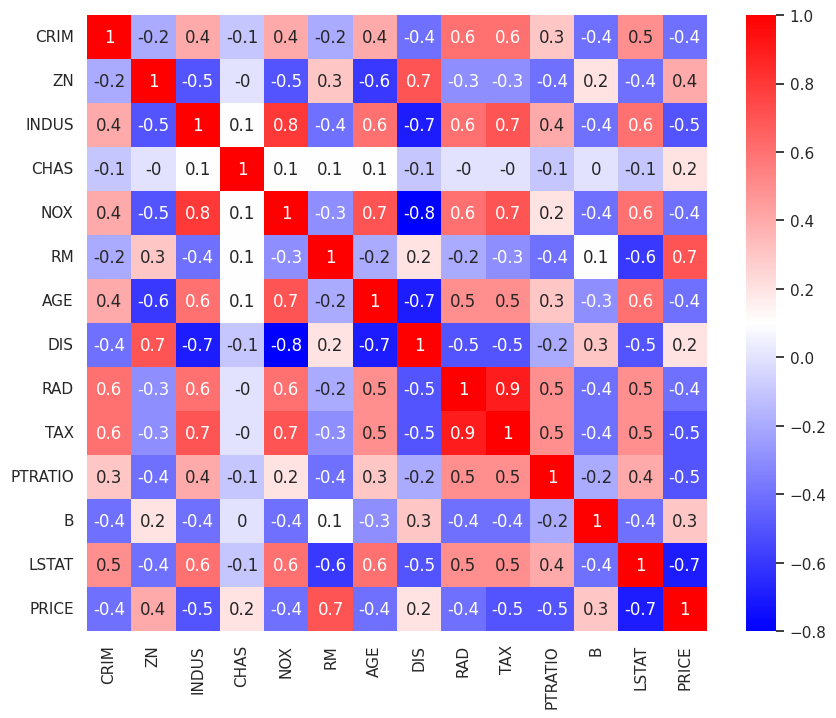

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 각 요소가 서로에게 얼마나 상관관계가 있는지 
corr_mat = boston_pd.corr().round(1)
sns.set_theme(style="whitegrid", rc={"figure.figsize": (10, 8)})
sns.heatmap(data=corr_mat, annot=True, cmap="bwr");

<Axes: xlabel='LSTAT', ylabel='PRICE'>

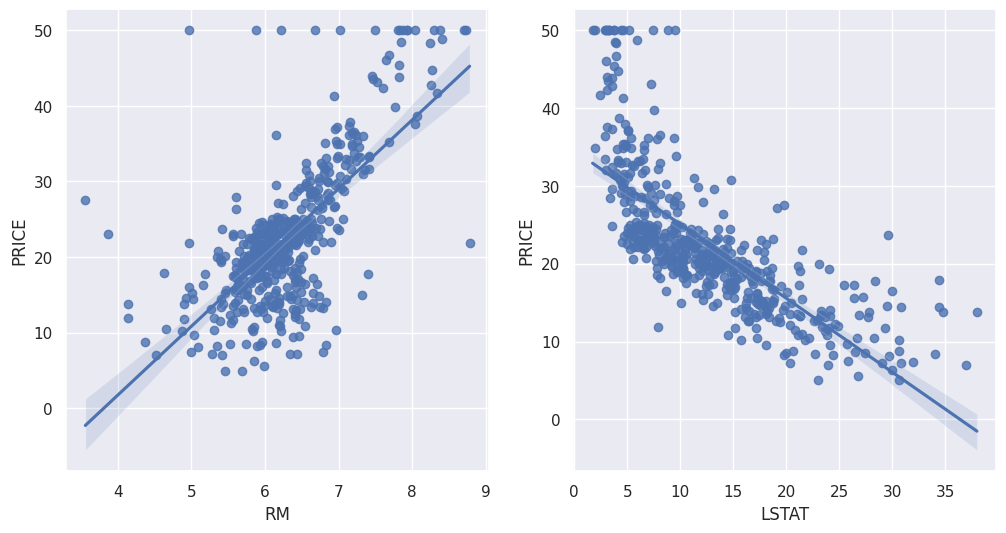

In [ ]:
# 제일 상관관계가 적고, 큰 값들을 가져와서 비교
sns.set_theme(style="darkgrid", rc={"figure.figsize": (12, 6)})
fig, ax = plt.subplots(ncols=2)
sns.regplot(x="RM", y="PRICE", data=boston_pd, ax=ax[0])
sns.regplot(x="LSTAT", y="PRICE", data=boston_pd, ax=ax[1])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# 데이터 나누기
X = boston_pd.drop("PRICE", axis=1)
y = boston_pd["PRICE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# LinearRegression를 사용
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [13]:
# 모델평가는 RMS로 진행
pred_tr = reg.predict(X_train) # 원래 train값에 대해서는 예측값을 보진 않지만 지금은 연습이여서!
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print("RMSE of Train Data : ", rmse_tr)
print("RMSE of Test Data : ", rmse_test)

RMSE of Train Data :  4.642806069019823
RMSE of Test Data :  4.931352584146701


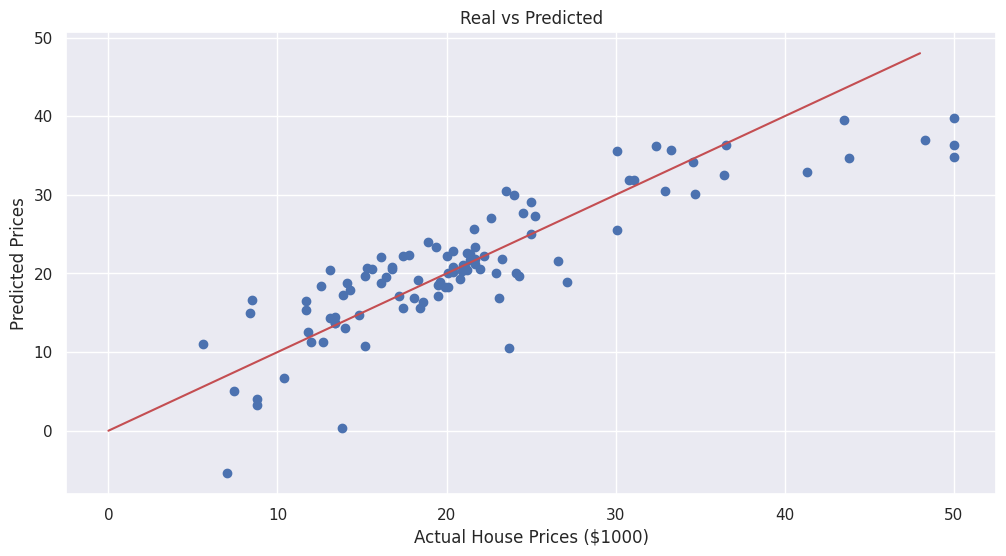

In [ ]:
# 성능확인
plt.scatter(y_test, pred_test)
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted Prices")
plt.title("Real vs Predicted")
plt.plot([0, 48], [0, 48], 'r')
plt.show()

### 이전에는 전체 데이터를 가지고 모델을 만들었는데,
### 이번에는 가장 큰 반대 상관계수를가진 LSTAT만 빼고 모델을 만들어서 예측해보자

In [16]:
# 데이터 나누기
X = boston_pd.drop(["PRICE", "LSTAT"], axis=1)
y = boston_pd["PRICE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# LinearRegression를 사용
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 모델평가는 RMS로 진행
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print("RMSE of Train Data : ", rmse_tr)
print("RMSE of Test Data : ", rmse_test) # 결과를 보면 이전에 했던 것보다 성능이 나빠짐을 관찰

RMSE of Train Data :  5.165137874244864
RMSE of Test Data :  5.295595032597169


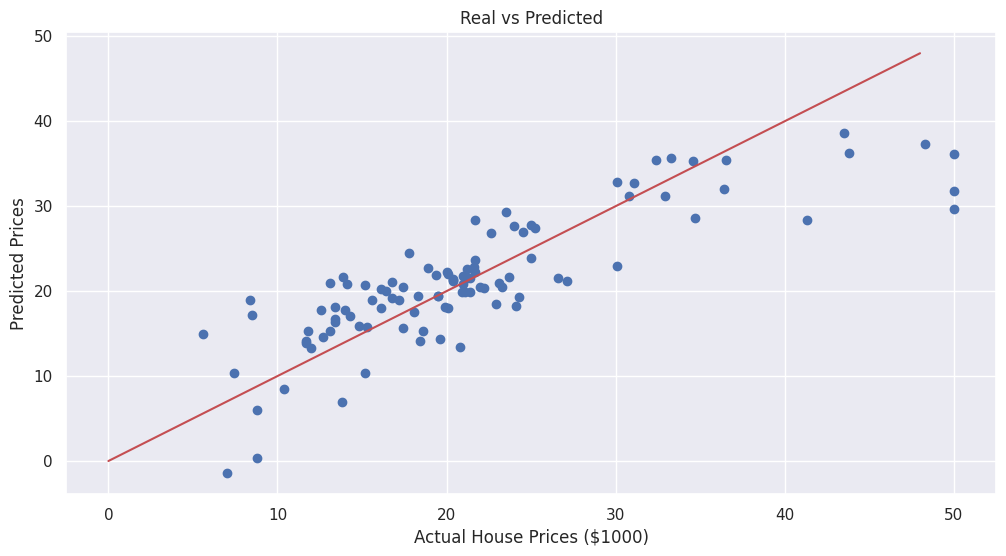

In [18]:
# 성능확인
plt.scatter(y_test, pred_test)
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted Prices")
plt.title("Real vs Predicted")
plt.plot([0, 48], [0, 48], 'r')
plt.show()

## 와인분류

In [22]:
import pandas as pd

# 데이터 읽어오기
red_wine = pd.read_csv("../data/winequality-red.csv", sep=";")
white_wine = pd.read_csv("../data/winequality-white.csv", sep=";")

In [21]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [24]:
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [36]:
# 데이터 하나로 합치기
red_wine["color"] = 1
white_wine["color"] = 0

wine = pd.concat([red_wine, white_wine])
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [37]:
wine["quality"].unique()

array([5, 6, 7, 4, 8, 3, 9])

In [38]:
import plotly.express as px

fig = px.histogram(wine, x="quality")
fig.show()

In [39]:
import plotly.express as px

fig = px.histogram(wine, x="quality", color="color")
fig.show()

### 모델 확인 했으니, 이제 분류하는 모델을 만들어보자

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# 정답지 빼고 데이터를 훈련용과 테스트용으로 나눠보자.
X = wine.drop(["color"], axis=1)
y = wine["color"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

np.unique(y_train, return_counts=True)

(array([0, 1]), array([3913, 1284]))

In [ ]:
import plotly.graph_objects as go

# plotly.graph_objects 를 이용해서 시각화 해보자.
fig = go.Figure()
fig.add_trace(go.Histogram(x=X_train["quality"], name="Train"))
fig.add_trace(go.Histogram(x=X_test["quality"], name="Test"))

fig.update_layout(barmode="overlay")
fig.update_traces(opacity=0.75)
fig.show()

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 훈련한 것으로 결정나무 만들어보자.
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

# 학습한 결과는?
y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print("Train Acc : ", accuracy_score(y_train, y_pred_tr))
print("Train Acc : ", accuracy_score(y_test, y_pred_test))

Train Acc :  0.9553588608812776
Train Acc :  0.9569230769230769


In [50]:
fig = go.Figure()
fig.add_trace(go.Box(y=X["fixed acidity"], name="fixed acidity"))
fig.add_trace(go.Box(y=X["chlorides"], name="chlorides"))
fig.add_trace(go.Box(y=X["quality"], name="quality"))

fig.update_layout(width=800, height=600)

fig.show()

- 컬럼들의 최대/최소 범위가 각각 다르고, 평균과 분산이 각각 다르다.
- 특성(feature)의 편향 문제는 최적의 모델을 찾는데 방해가 될 수도 있다.
- 이럴 때 쓰는 것이 MinMaxScaler와 StandardScaler이다

In [56]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# MinMaxScaler, StandardScaler 전처리 진행
MMS = MinMaxScaler()
SS = StandardScaler()

SS.fit(X)
MMS.fit(X)

X_ss = SS.transform(X)
X_mms = MMS.transform(X)

X_ss_pd = pd.DataFrame(X_ss, columns=X.columns)
X_mms_pd = pd.DataFrame(X_mms, columns=X.columns)

In [ ]:
# StandardScaler? 평균을 0으로 표준편차를 1로 맞추는 것
# StandardScaler of colums 시각화
fig = go.Figure()
fig.add_trace(go.Box(y=X_ss_pd["fixed acidity"], name="fixed acidity"))
fig.add_trace(go.Box(y=X_ss_pd["chlorides"], name="chlorides"))
fig.add_trace(go.Box(y=X_ss_pd["quality"], name="quality"))

fig.update_layout(width=800, height=600)
fig.update_layout(title="StandardScaler of colums", title_x=0.5)

fig.show()

In [ ]:
# MinMaxScaler? 최대 최소값을 1과 0으로 강제로 맞추는 것
# MinMaxScaler of colums 시각화
fig = go.Figure()
fig.add_trace(go.Box(y=X_mms_pd["fixed acidity"], name="fixed acidity"))
fig.add_trace(go.Box(y=X_mms_pd["chlorides"], name="chlorides"))
fig.add_trace(go.Box(y=X_mms_pd["quality"], name="quality"))

fig.update_layout(width=800, height=600)
fig.update_layout(title="MinMaxScaler of colums", title_x=0.5)

fig.show()

### 그럼 이번에는 StandardScaler 적용해서 다시 학습해보자
- 하지만 결과는 결정나무에서는 이런 전처리는 거의 효과가 없음을 유의하기.
- 또한 지금 우리가 학습하는 데이터는 비교적 양이 적기때문에 학습률이 좋을수도 있음을 참고하기

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_ss_pd, y, test_size=0.2, random_state=13)

# 훈련한 것으로 결정나무 만들어보자.
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

# 학습한 결과는?
y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print("Train Acc : ", accuracy_score(y_train, y_pred_tr))
print("Train Acc : ", accuracy_score(y_test, y_pred_test))

Train Acc :  0.9553588608812776
Train Acc :  0.9569230769230769


### 이번에는 MinMaxScaler!

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_mms_pd, y, test_size=0.2, random_state=13)

# 훈련한 것으로 결정나무 만들어보자.
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

# 학습한 결과는?
y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print("Train Acc : ", accuracy_score(y_train, y_pred_tr))
print("Train Acc : ", accuracy_score(y_test, y_pred_test))

Train Acc :  0.9553588608812776
Train Acc :  0.9569230769230769


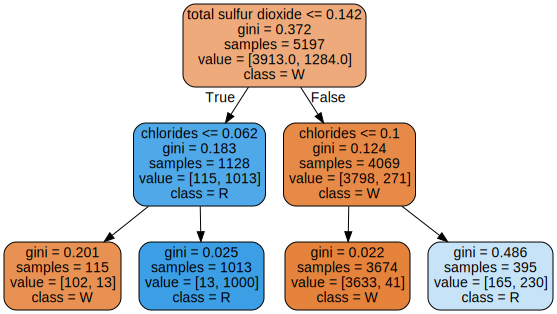

In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz

# 트리를 직접 그려서 결정나무는 어떻게 화이트와인과 레드와인을 구분하는지 확인
Source(export_graphviz(wine_tree, feature_names=X_train.columns,
                       class_names=['W', 'R'],
                       rounded=True, filled=True))

In [69]:
# 결과를 봤을 때, total sulfur dioxide, chlorides 가 레드와인과 화이트와인을 구분하는 중요한 요소임
dict(zip(X_train.columns, map(float, wine_tree.feature_importances_)))

{'fixed acidity': 0.0,
 'volatile acidity': 0.0,
 'citric acid': 0.0,
 'residual sugar': 0.0,
 'chlorides': 0.24230360549660776,
 'free sulfur dioxide': 0.0,
 'total sulfur dioxide': 0.7576963945033922,
 'density': 0.0,
 'pH': 0.0,
 'sulphates': 0.0,
 'alcohol': 0.0,
 'quality': 0.0}

### 번외로 max_depth를 변화시켜가면서 확인해보자

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_mms_pd, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=5, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

dict(zip(X_train.columns, map(float, wine_tree.feature_importances_)))

{'fixed acidity': 0.0,
 'volatile acidity': 0.05171798979386998,
 'citric acid': 0.0,
 'residual sugar': 0.0014290480099964137,
 'chlorides': 0.21533787452279057,
 'free sulfur dioxide': 0.0,
 'total sulfur dioxide': 0.7005081166374921,
 'density': 0.01883856111436604,
 'pH': 0.0008730004245325191,
 'sulphates': 0.011295409496952279,
 'alcohol': 0.0,
 'quality': 0.0}

### 이번에는 와인 맛에 대한 분류. - 이진 분류

In [ ]:
# taste 칼럼 추가하고, quality를 이진화해서 데이터 정리
wine["taste"] = [1. if grade>5 else 0. for grade in wine["quality"]]
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
 13  taste                 6497 non-null   float64
dtypes: float64(12), int64(2)
memory usage: 761.4 KB


In [78]:
X = wine.drop(["taste"], axis=1)
y = wine["taste"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print("Train Acc : ", accuracy_score(y_train, y_pred_tr))
print("Train Acc : ", accuracy_score(y_test, y_pred_test))

Train Acc :  1.0
Train Acc :  1.0


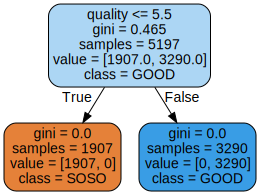

In [ ]:
# 한번 그림으로 분석해보자
Source(export_graphviz(wine_tree, feature_names=X_train.columns, 
                       class_names=["SOSO", "GOOD"],
                       rounded=True, filled=True))

#### X데이터가 taste를 만들 때 썼던 quality를 사용했는데, 그대로 quality를 넣고 학습을 했기때문에 100프로

In [80]:
# X에 quality 컬럼도 빼고 다시
X = wine.drop(["taste", "quality"], axis=1)
y = wine["taste"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print("Train Acc : ", accuracy_score(y_train, y_pred_tr))
print("Train Acc : ", accuracy_score(y_test, y_pred_test))

Train Acc :  0.7294593034442948
Train Acc :  0.7161538461538461


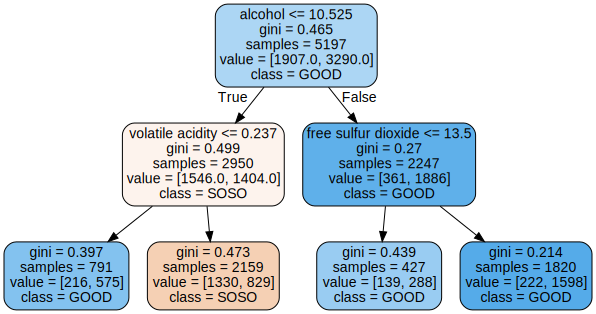

In [82]:
# 결과 결정나무 그림으로 확인
Source(export_graphviz(wine_tree, feature_names=X_train.columns, 
                       class_names=["SOSO", "GOOD"],
                       rounded=True, filled=True))